# Hypothesis Testing

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats # from scipy.stats import norm,t

# Case Study 1 : Supermarket Loyalty Prog

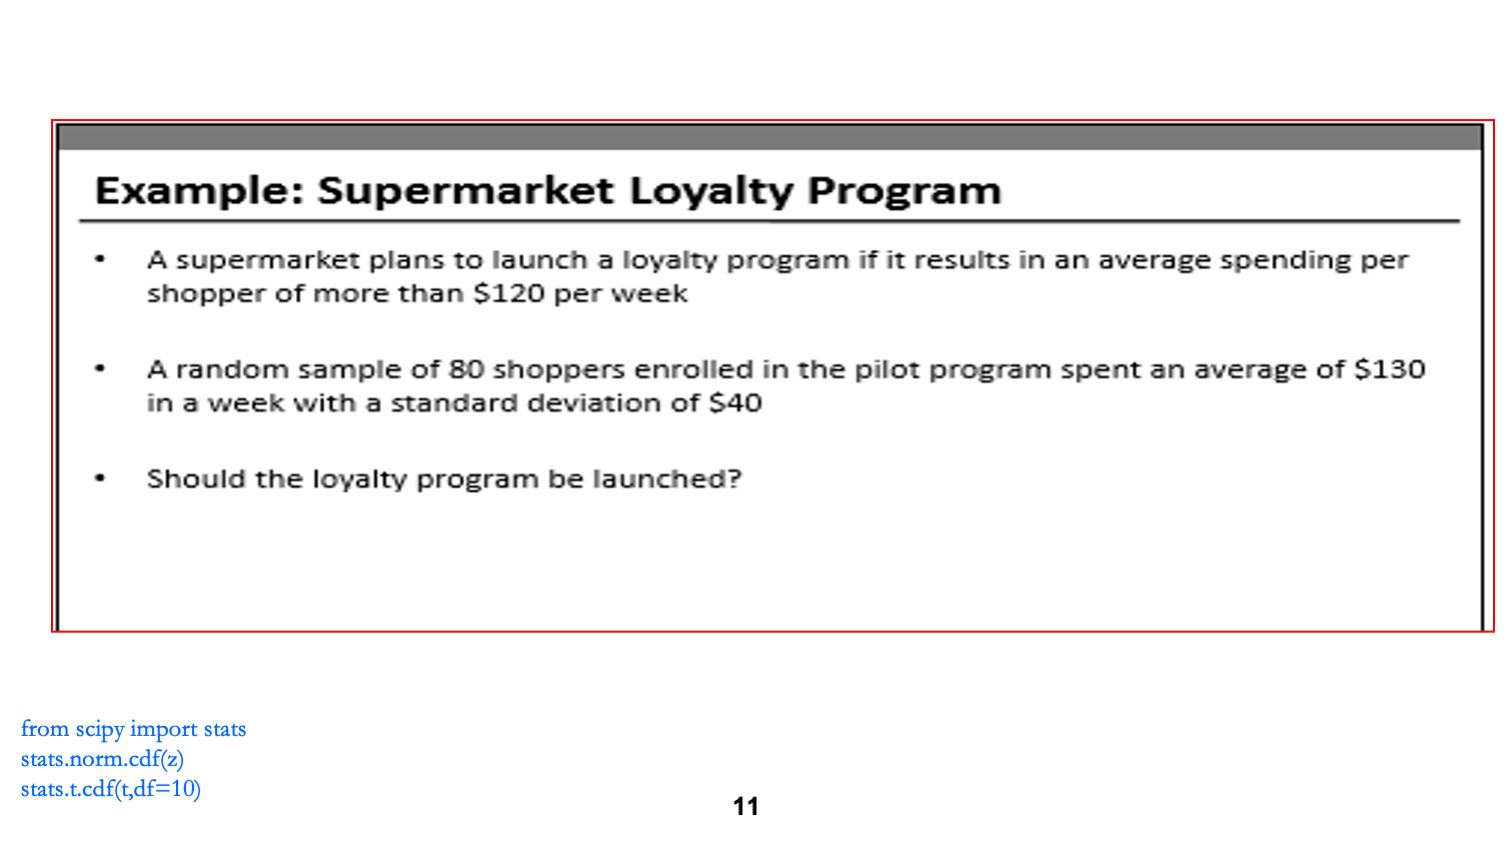

$H_0$: $\mu$ = 120   (The average spend is $120, so the loyalty program is not to be launched)

$H_a$: $\mu$ > 120   (The average spend is greater than $120, So launch the loyalty program)

In [2]:
# compute the probability of type 1 error
1-stats.t.cdf(130,79,loc=120,scale=40/np.sqrt(80))

0.014084316277010789

Conclusion:  Reject the null hypothesis. Launch the loyalty programme.

# Case Study 2 : Call Center Process

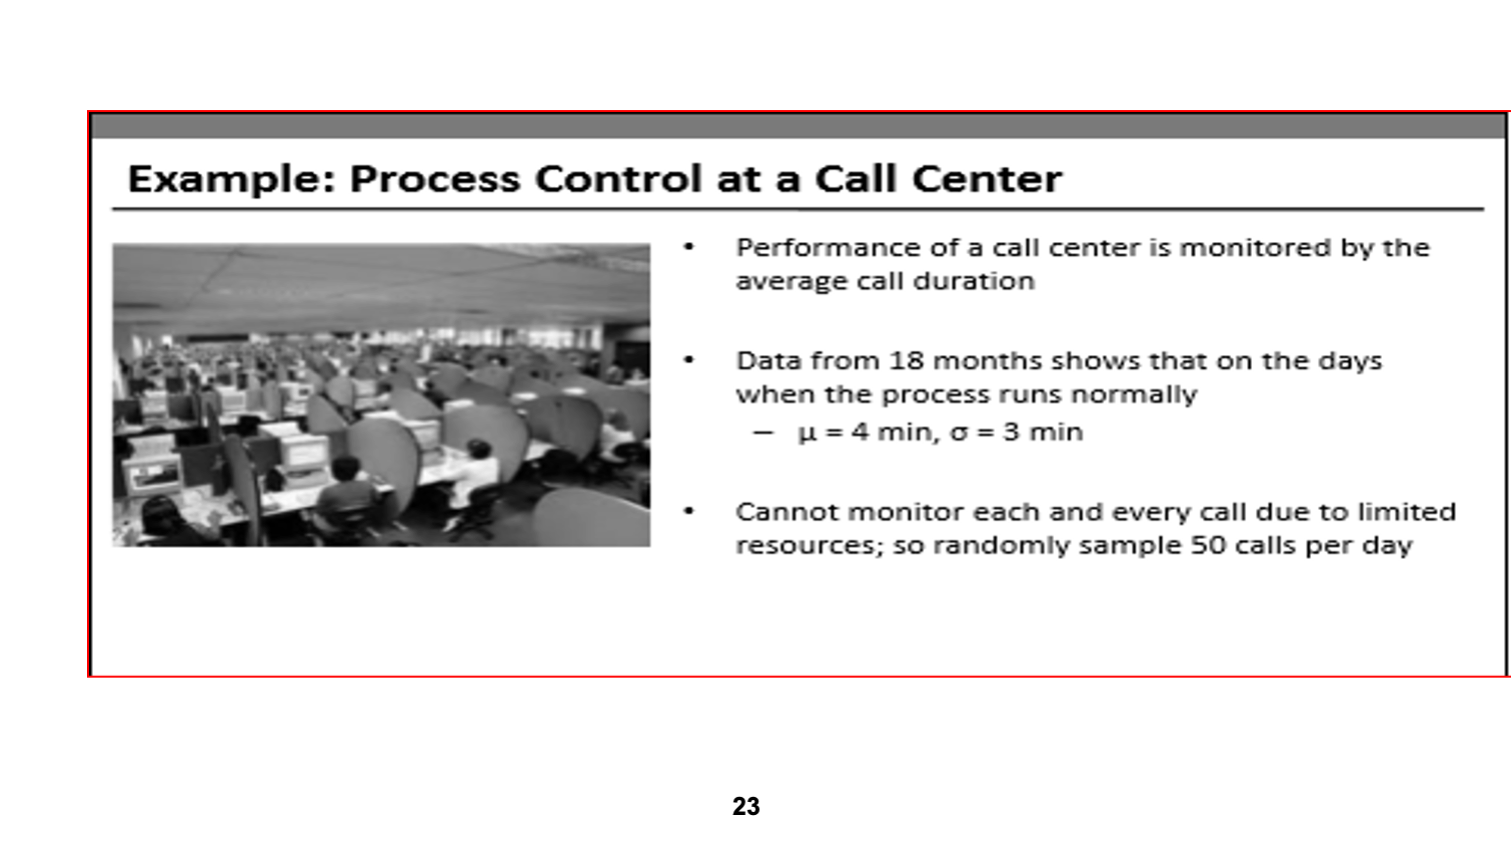

Let us say that the mean call duration on the 50 calls is 4.6. Is the process out of control so that it should be investigated?

$H_0$: $\mu$ = 4   (The process is under control, no need to investigate)

$H_a$: $\mu$ != 4   (The process is not in control, investigate)

compute the calculated probability(pvalue) of type 1 error using z test. Remember that this is a 2 tailed test

In [3]:
(1-stats.norm.cdf(4.6,loc=4,scale=4/np.sqrt(50)))*2

0.28884436634648525

Conclusion : The process is in control. THere is no need to investigate.

Let us say that the mean call duration on the 50 calls is 5.3. Is the process out of control so that it should be investigated?

$H_0$: $\mu$ = 4   (The process is under control, no need to investigate)

$H_a$: $\mu$ != 4   (The process is not in control, investigate)

In [4]:
# compute the calculated probability(pvalue) of type 1 error. Remember that this is a 2 tailed test

(1-stats.norm.cdf(5.3,loc=4,scale=4/np.sqrt(50)))*2

0.02155626676001643

The process is out of control and needs to be investigated as the calculated probability (pvalue) of committing type 1 error is less than the significance level of 0.05

# Case Study 3 : Salmonella Content in Ice Cream

An outbreak of Salmonella-related illness was attributed to ice cream produced at a certain factory. Scientists measured the level of Salmonella in 9 randomly sampled batches of ice cream. The levels (in MPN/g) were 

0.593, 0.142, 0.329, 0.691, 0.231, 0.793, 0.519, 0.392, 0.418

Is there evidence that the mean level of Salmonella in the ice cream is greater than 0.3 MPN/g? 

Hypothesis Formulation:

$H_0: {\mu}$ = 0.3

$H_a: {\mu}$ > 0.3

In [5]:
# import 1sample t test function from scipy
from scipy.stats import ttest_1samp

In [6]:
# create a pandas series of the values
sal = pd.Series([0.593, 0.142, 0.329, 0.691, 0.231, 0.793, 0.519, 0.392, 0.418])
sal

0    0.593
1    0.142
2    0.329
3    0.691
4    0.231
5    0.793
6    0.519
7    0.392
8    0.418
dtype: float64

In [8]:
# get the calculated probability(pvalue) of type 1 error using 1sample ttest 
tstat, pvalue = ttest_1samp(sal,0.3,alternative='greater')
pvalue

0.029265164842448826

## Conclusion:

The null hypothesis is rejected as the calculated probability(pvalue) is 0.03 which is less than the significance level of 5%. So we conclude that the ice creams are causing salmonellla.

# Case Study 4: Drug Treatment Effect

6 patients were given a drug (treatment group) and an additional 6 patients a placebo (control group). Their reaction time to a stimulus was measured (in ms). . Below given is the data for the 2 groups of 6 patients each. The drug manufacturer believes that the drug treatment increases the reaction time.We want to perform a statistical test for comparing the means of the treatment and control groups

Control  : 91, 87, 99, 77, 88, 91

Treat :101, 110, 103, 93, 99, 104 

## Hypothesis Formulation

$H_0: \mu_t = \mu_c$ ( or $\mu_diff = 0$)

$H_a: \mu_t > \mu_c$ ( or $\mu_diff > 0$)

where $\mu_diff$ is defined as $\mu_t -\mu_c$



In [9]:
# create series object for control and treatment group measurements
control = pd.Series([91, 87, 99, 77, 88, 91])
treat = pd.Series([101, 110, 103, 93, 99, 104])

In [10]:
# import the appropriate ttest function
from scipy.stats import ttest_ind

In [11]:
# conduct the ttest & get the pvalue
tstat, pvalue = ttest_ind(treat,control,alternative='greater')
pvalue

0.0031360621754049013

## Conclusion:

The null hypothesis is rejected and the manufacturer's claim that the drug increases response time is accepted.